# CSC 466 Fall 2023 Lab 1
### Sophia Chung, spchung@calpoly.edu
### Anagha Sikha, arsikha@calpoly.edu
#### Data extraction, analysis, and visualization of our questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_national = pd.read_csv('http://www.csc.calpoly.edu/~dekhtyar/466-Fall2023/data/NationalNames.csv').drop(columns='Id')
df_state = pd.read_csv('http://www.csc.calpoly.edu/~dekhtyar/466-Fall2023/data/StateNames.csv').drop(columns='Id')

## Question 1: Is there an association between important events related to top female musical artists and naming babies after these artists?

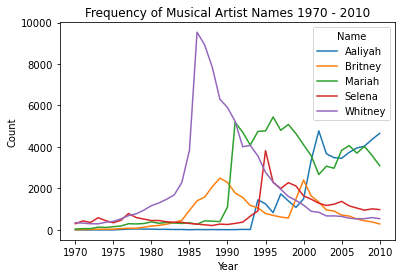

In [3]:
artists = ['Britney', 'Selena', 'Whitney', 'Aaliyah', 'Mariah']
filtered_df = df_national[(df_national['Name'].isin(artists)) & 
                          (df_national['Gender'] == 'F') &
                          (df_national['Year'] >= 1970) & 
                          (df_national['Year'] <= 2010)]
grouped_df = filtered_df.groupby(['Year', 'Name'])['Count'].sum().unstack().fillna(0)
# grouped_df = pd.crosstab(filtered_df['Year'], filtered_df['Name'], filtered_df['Count'], aggfunc='sum').fillna(0)
ax = grouped_df.plot.line(title='Frequency of Musical Artist Names 1970 - 2010')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.savefig('Figure1.jpeg')

In [4]:
max_values = grouped_df.max()
max_years = grouped_df.idxmax()

for name, max_value in max_values.items():
    max_year = max_years[name]
    print(f"{name}: Year {max_year}, Highest Peak Count {max_value}")

Aaliyah: Year 2002, Highest Peak Count 4778.0
Britney: Year 1989, Highest Peak Count 2496.0
Mariah: Year 1996, Highest Peak Count 5445.0
Selena: Year 1995, Highest Peak Count 3824.0
Whitney: Year 1986, Highest Peak Count 9532.0


In [5]:
slopes = dict.fromkeys(max_values.keys().tolist(), None)
i = 0
for artist in max_values.keys().tolist():
    df_artist = grouped_df[artist]
    before = df_artist[max_years[i] - 1]
    curr = df_artist[max_years[i]]
    after = df_artist[max_years[i] + 1]
    rise = (curr - before) / before * 100
    decline = (before - after) / before * 100
    slopes[artist] = [rise, decline]
    i += 1
slopes

{'Aaliyah': [42.5417661097852, -9.516706443914082],
 'Britney': [19.88472622478386, -10.134486071085496],
 'Mariah': [14.055299539170507, -0.5865102639296188],
 'Selena': [317.01199563794984, -149.83642311886587],
 'Whitney': [148.68249412992435, -132.79415601356638]}

## Question 2: Is there a difference in the popularity of the most common biblical names on the West Coast (California) versus the East Coast (Florida)?

In [6]:
male = ['Simon', 'Simeon', 'Joseph', 'Joses', 'Lazarus','Judah', 'John', 'Jesus', 'Ananias', 
        'Jonathan', 'Matthew', 'Matthias', 'Manaen', 'James', 'Michael']
female = ['Mary', 'Salome', 'Shelamzion', 'Martha', 'Joanna', 'Sapphira', 'Berenice', 
          'Imma', 'Mara', 'Cyprus','Sarah', 'Alexandra']

In [7]:
def split(gender, state):
    return state[state['Gender'] == gender]

def get_bib(bib, split):
    return split[split['Name'].isin(bib)]

In [8]:
ca = df_state[df_state['State'] == 'CA']
fl = df_state[df_state['State'] == 'FL']

ca_male = split('M', ca)
ca_female = split('F', ca)
fl_male = split('M', fl)
fl_female = split('F', fl)

In [9]:
ca_male_bib = get_bib(male, ca_male)
ca_female_bib = get_bib(female, ca_female)
fl_male_bib = get_bib(male, fl_male)
fl_female_bib = get_bib(female, fl_female)

ca_bib = pd.concat([ca_male_bib, ca_female_bib], ignore_index=True)
fl_bib = pd.concat([fl_male_bib, fl_female_bib], ignore_index=True)

all_bib = pd.concat([ca_bib, fl_bib], ignore_index=True)
all_bib['bib'] = 1

not_bib = pd.concat([ca, fl, all_bib]).drop_duplicates(keep=False).reset_index(drop=True)
not_bib['bib'] = 0

ca_fl = pd.concat([all_bib, not_bib])

In [10]:
year_state_bib = pd.crosstab([ca_fl['Year'], ca_fl['State']], ca_fl['bib'], ca_fl['Count'], aggfunc='sum')
year_state_bib['prop_bib'] = year_state_bib[1] / (year_state_bib[0] + year_state_bib[1])
year_state_bib

bib              0      1  prop_bib
Year State                         
1910 CA      10043    879  0.080480
     FL       7354    740  0.091426
1911 CA      10854    870  0.074207
     FL       6903    734  0.096111
1912 CA      19562   1618  0.076393
...            ...    ...       ...
2012 FL     176186   5274  0.029064
2013 CA     442760  12672  0.027824
     FL     178801   5202  0.028271
2014 CA     449265  12713  0.027519
     FL     183329   5182  0.027489

[210 rows x 3 columns]

In [11]:
idx = year_state_bib['prop_bib'].idxmax()
year_state_bib.loc[idx]

bib
0           6903.000000
1            734.000000
prop_bib       0.096111
Name: (1911, FL), dtype: float64

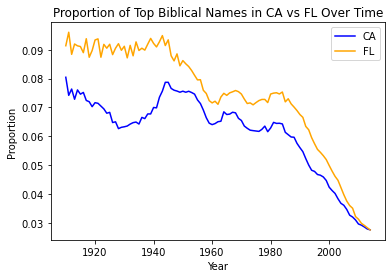

In [12]:
plt.plot(np.sort(ca_bib['Year'].unique()), 
         year_state_bib[::2]['prop_bib'].values,
         color='blue')
plt.plot(np.sort(fl_bib['Year'].unique()), 
         year_state_bib[1::2]['prop_bib'].values,
         color='orange')
plt.legend(['CA' ,'FL'])
plt.title('Proportion of Top Biblical Names in CA vs FL Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.savefig('Figure2.jpeg')
plt.show()

In [13]:
year_state_bib.loc[2014]

bib,0,1,prop_bib
State,,,
CA,449265,12713,0.027519
FL,183329,5182,0.027489


In [14]:
male = all_bib[all_bib['Gender'] == 'M']
female = all_bib[all_bib['Gender'] == 'F']

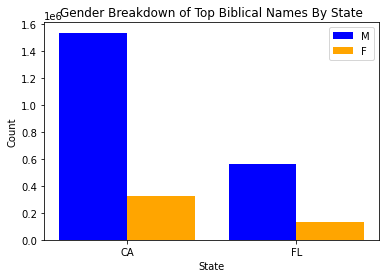

In [15]:
width = 0.4
x = np.arange(2)
plt.bar(x-0.2, male.groupby('State').sum('Count')['Count'], width, color='blue')
plt.bar(x+0.2, female.groupby('State').sum('Count')['Count'], width, color='orange')
plt.xticks(x, ['CA', 'FL'])
plt.legend(['M', 'F'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Gender Breakdown of Top Biblical Names By State')
plt.savefig('Figure3.jpeg')
plt.show()

## Question 3: Can we track the gender breakdown of the name “Rory” and its other spellings "Rori" and "Rorie" over the 20th century?

In [16]:
def get_df(name):
    return df_national[(df_national['Name'] == name) & 
                (df_national['Year'] > 1900) &
                (df_national['Year'] < 2000)]

def get_ct(df):
    ct = pd.crosstab(df['Year'], df['Gender'], df['Count'], aggfunc='sum').fillna(0)
    ct['prop_male'] = ct['M'] / (ct['F'] + ct['M'])
    ct['prop_female'] = ct['F'] / (ct['F'] + ct['M'])
    return ct

In [17]:
df_rory = get_df('Rory')
df_rori = get_df('Rori')
df_rorie = get_df('Rorie')

ct_rory = get_ct(df_rory)
ct_rori = get_ct(df_rori)
ct_rorie = get_ct(df_rorie)

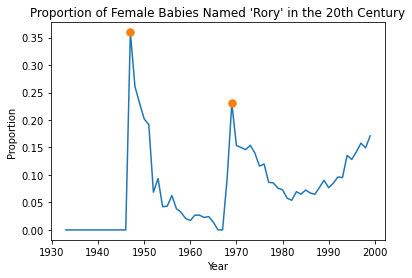

In [18]:
plt.plot(np.sort(df_rory['Year'].unique()), ct_rory['prop_female'].values)
plt.plot([1947, 1969], [0.359649, 0.230263], marker='.', ls='none', ms=15)
plt.title("Proportion of Female Babies Named 'Rory' in the 20th Century")
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.savefig('Figure4.jpeg')
plt.show()

In [19]:
idx = ct_rory['prop_female'].idxmax()
ct_rory.loc[idx]

Gender
F              41.000000
M              73.000000
prop_male       0.640351
prop_female     0.359649
Name: 1947, dtype: float64

In [20]:
ct_rory.loc[1960:1970]

Gender,F,M,prop_male,prop_female
Year,,,,
1960,11.0,636.0,0.982998,0.017002
1961,14.0,505.0,0.973025,0.026975
1962,14.0,509.0,0.973231,0.026769
1963,9.0,388.0,0.977330,0.022670
1964,9.0,363.0,0.975806,0.024194
1965,5.0,353.0,0.986034,0.013966
1966,0.0,254.0,1.000000,0.000000
1967,0.0,202.0,1.000000,0.000000
1968,18.0,171.0,0.904762,0.095238


In [21]:
ct_rory.head(20)

Gender,F,M,prop_male,prop_female
Year,,,,
1933,0.0,5.0,1.000000,0.000000
1939,0.0,5.0,1.000000,0.000000
1940,0.0,7.0,1.000000,0.000000
1941,0.0,10.0,1.000000,0.000000
1942,0.0,16.0,1.000000,0.000000
1943,0.0,14.0,1.000000,0.000000
1944,0.0,14.0,1.000000,0.000000
1945,0.0,20.0,1.000000,0.000000
1946,0.0,37.0,1.000000,0.000000


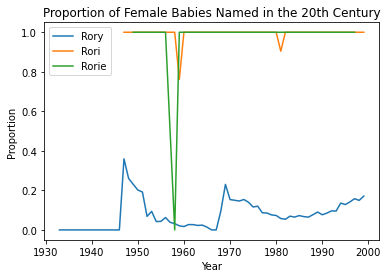

In [22]:
plt.plot(np.sort(df_rory['Year'].unique()), ct_rory['prop_female'].values)
plt.plot(np.sort(df_rori['Year'].unique()), ct_rori['prop_female'].values)
plt.plot(np.sort(df_rorie['Year'].unique()), ct_rorie['prop_female'].values)
plt.title('Proportion of Female Babies Named in the 20th Century')
plt.legend(['Rory', 'Rori', 'Rorie'])
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.savefig('Figure5.jpeg')
plt.show()